#                                      Boardgames Data Analysis

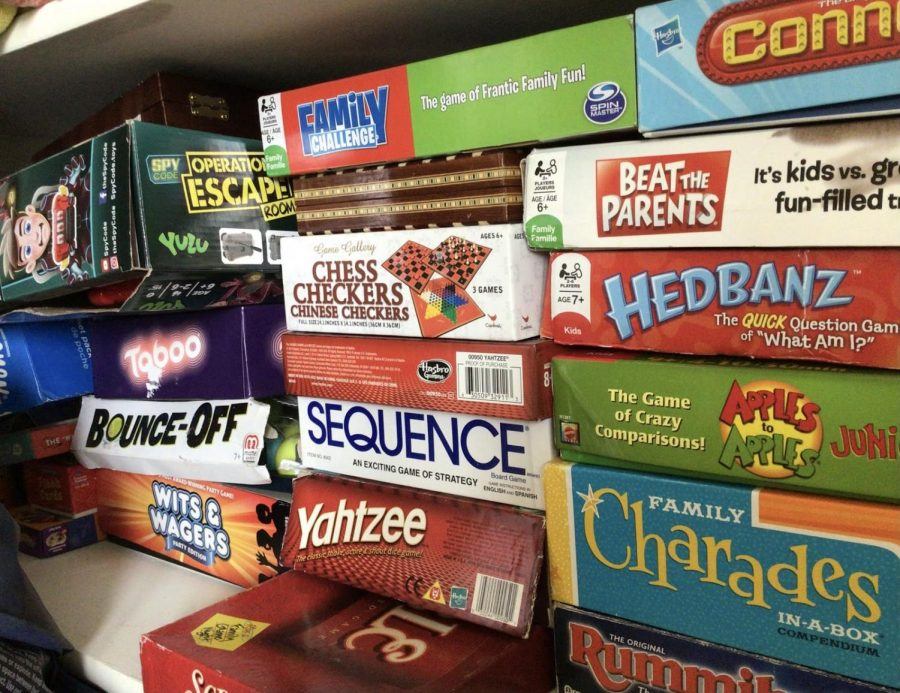

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading data and Initial EDA:

- Renamed few columns for clarity.
- Displaying column names and first few rows of the data.


In [2]:
brdg_df = pd.read_csv('boardgames1.csv')

In [3]:
brdg_df.columns = brdg_df.columns.str.replace('baverage','geek_rating')
brdg_df.columns = brdg_df.columns.str.replace('average','average_rating')
brdg_df.columns = brdg_df.columns.str.replace('boardgamehonor_cnt','award_counts')
brdg_df.columns = brdg_df.columns.str.replace('news','BGG_news')
brdg_df.columns = brdg_df.columns.str.replace('blogs','BGG_blogs')

In [4]:
brdg_df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average_rating', 'geek_rating', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'BGG_news', 'BGG_blogs',
       'weblink', 'podcast', 'label', 'boardgamedesigner_cnt',
       'boardgameartist_cnt', 'boardgamepublisher_cnt', 'award_counts',
       'boardgamecategory_cnt', 'boardgamemechanic_cnt',
       'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'boardgamehonor', 'boardgamecategory', 'boardgameversion',
       'boardgamemechanic', 'boardgameexpansion', 'boardgamefamily',
       'description', 'gamelink'],
      dtype='object')

In [6]:
#brdg_df.head(10)

In [7]:
brdg_df['min_community'] = brdg_df['min_community'].fillna(brdg_df['min_community'].mean())
brdg_df['max_community'] = brdg_df['max_community'].fillna(brdg_df['max_community'].mean())

In [67]:
#brdg_df.isnull().sum()

In [9]:
brdg_df.describe()

,objectid,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,...,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,award_counts,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,88667.61500,1981.268700,10000.500000,2.055250,5.59215,68.096450,94.28945,9.476350,3.203522,4.277917,...,1.943050,1.339200,1.379250,2.500100,0.436000,2.568050,2.306900,1.185750,3.392800,1.429500
std,90640.91959,219.223277,5773.647028,0.745537,15.04921,466.502106,1005.75196,3.738842,1.176300,1.854509,...,7.956222,0.787003,4.768926,5.082961,1.609824,1.366515,1.707764,6.809425,12.317236,1.728375
min,1.00000,-3500.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5858.75000,1997.000000,5000.750000,2.000000,4.00000,20.000000,30.00000,8.000000,2.000000,4.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,39278.50000,2008.000000,10000.500000,2.000000,4.00000,30.000000,45.00000,10.000000,3.203522,4.277917,...,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000
75%,169680.50000,2015.000000,15000.250000,2.000000,6.00000,60.000000,90.00000,12.000000,4.000000,5.000000,...,1.000000,2.000000,2.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.000000,2.000000
max,295770.00000,2021.000000,20000.000000,10.000000,999.00000,60000.000000,120000.00000,25.000000,31.000000,31.000000,...,577.000000,21.000000,508.000000,174.000000,50.000000,14.000000,18.000000,444.000000,1002.000000,86.000000


## Evaluating geek ratings

Text(0, 0.5, 'Density')

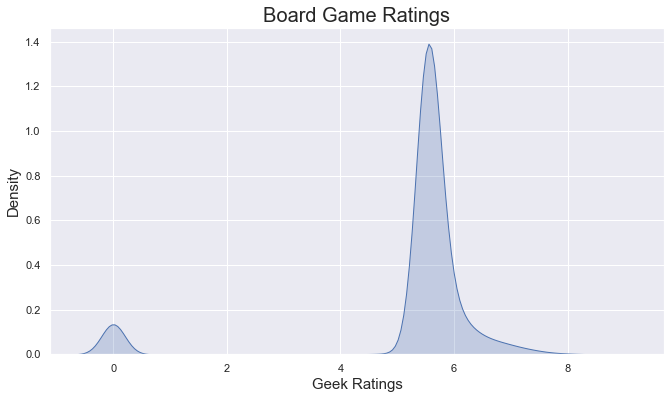

In [8]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(brdg_df['geek_rating'], shade = True).set_title('Board Game Ratings',fontsize = 20)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

### Evaluation of 100 highest rated boardgames

In [9]:
rating_views_top = brdg_df[['name','geek_rating',"siteviews"]]\
        .sort_values('geek_rating',ascending=False).head(150)
rating_views_top

,name,geek_rating,siteviews
0,Gloomhaven,8.58424,8933078
1,Pandemic Legacy Season 1,8.47159,2971746
2,Terraforming Mars,8.26781,4724387
3,Through the Ages A New Story of Civilization,8.23513,2448074
4,Brass Birmingham,8.20459,894621
...,...,...,...
144,\u062c\u0648\u0627\u0647\u0631\u064a,7.35206,1730330
145,Goa A New Expedition,7.34947,873752
146,Tichu,7.34824,802488
147,Detective A Modern Crime Board Game,7.34381,490214


In [10]:
rating_views_top.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,7.624845,1.661943e+06
std,0.254136,1.228917e+06
min,7.342780,2.738540e+05
25%,7.426147,8.451090e+05
50%,7.556870,1.255121e+06
75%,7.768045,2.044964e+06
max,8.584240,8.933078e+06


Text(0, 0.5, 'Density')

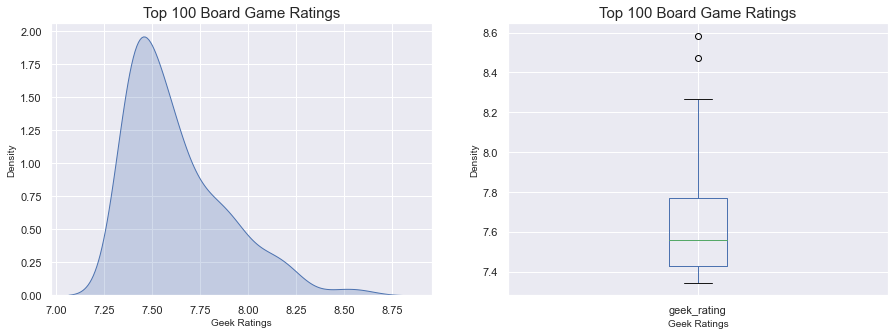

In [11]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(rating_views_top['geek_rating'], shade = True).set_title('Top 100 Board Game Ratings', fontsize = 15)
plt.xlabel('Geek Ratings', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.subplot(122)
rating_views_top['geek_rating'].plot.box(figsize=(15,5)).set_title('Top 100 Board Game Ratings', fontsize = 15)
plt.xlabel('Geek Ratings', fontsize = 10)
plt.ylabel('Density', fontsize = 10)

Text(0.5, 1.0, 'Top 100: site views vs. geek ratings')

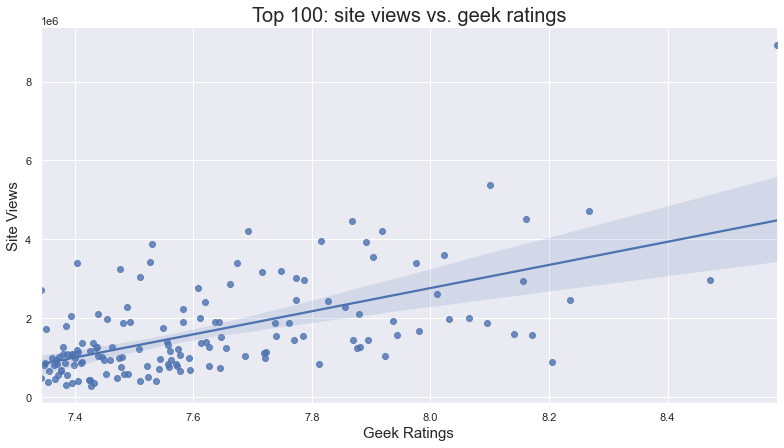

In [12]:
sns.lmplot("geek_rating", "siteviews", rating_views_top, height=6, aspect=1.8)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Top 100: site views vs. geek ratings', fontsize = 20)

### Evaluation of 100 lowest rated boardgames

In [13]:
rating_views_bottom = brdg_df[['name','geek_rating',"siteviews"]]\
        .sort_values('geek_rating',ascending=False)\
        .loc[brdg_df.geek_rating > 0,:].tail(150)
rating_views_bottom

,name,geek_rating,siteviews
18261,Go To The Top Of The Class,5.33274,67126
18262,Feed the Kitty,5.33239,27893
18263,Pass the Pigs,5.33201,248338
18264,Fallen City of Karez,5.33149,140708
18265,Trivial Pursuit 20th Anniversary Edition,5.33024,66814
...,...,...,...
18406,War,3.98527,53095
18407,Bingo,3.89746,45273
18408,Candy Land The Disney Theme Park Edition,3.77222,285110
18409,Chutes and Ladders,3.58867,226580


In [14]:
rating_views_bottom.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,5.077048,1.399950e+05
std,0.349820,4.432717e+05
min,3.506730,8.410000e+03
25%,5.004008,4.027025e+04
50%,5.219855,6.750250e+04
75%,5.296655,1.199375e+05
max,5.332740,5.349478e+06


Text(0.5, 1.0, 'Bottom 100 Board Game Ratings')

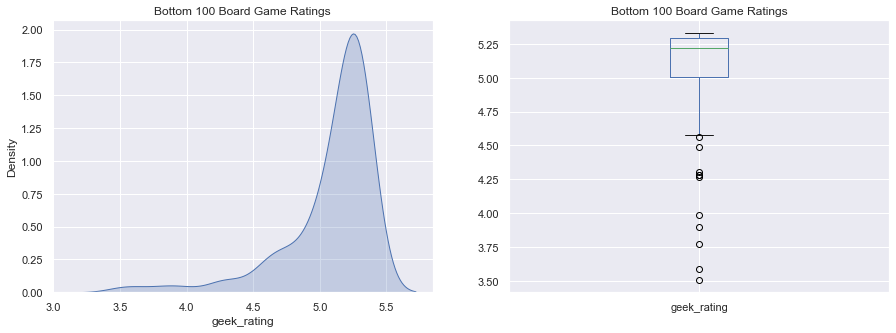

In [15]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(rating_views_bottom['geek_rating'], shade = True).set_title('Bottom 100 Board Game Ratings')
plt.subplot(122)
rating_views_bottom['geek_rating'].plot.box(figsize=(15,5)).set_title('Bottom 100 Board Game Ratings')

Text(0.5, 1.0, 'Bottom 100: site views vs. geek ratings')

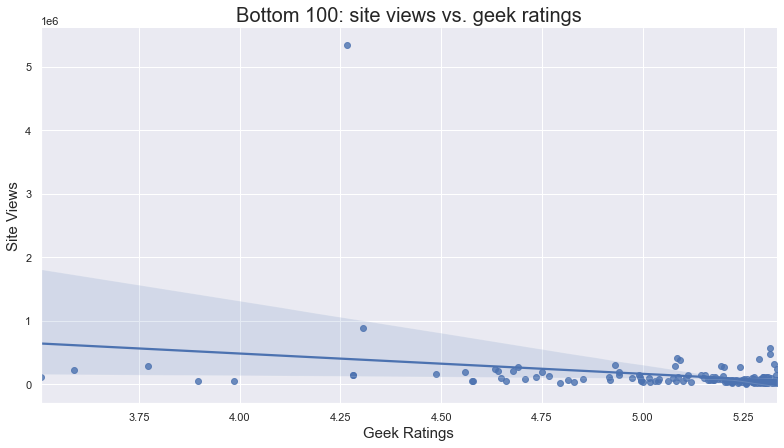

In [16]:
sns.lmplot("geek_rating", "siteviews", rating_views_bottom, height=6, aspect=1.8)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Bottom 100: site views vs. geek ratings', fontsize = 20)

Text(0.5, 1.0, 'Trend depicting site views and geek ratings')

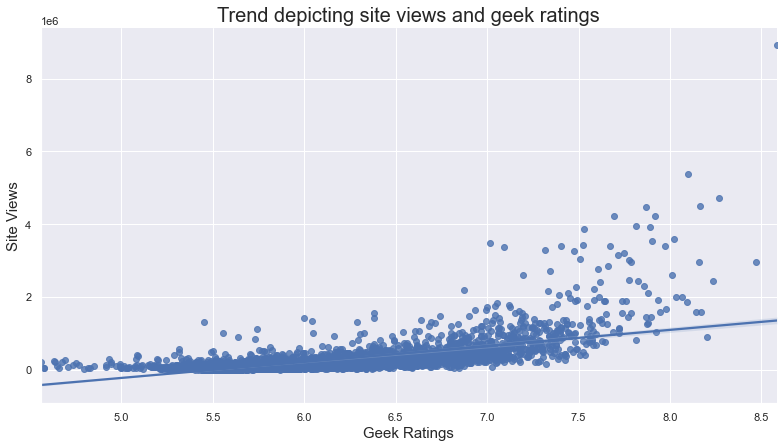

In [17]:
sns.lmplot("geek_rating", "siteviews", brdg_df.loc[brdg_df.geek_rating > 4.5,:], height=6, aspect=1.8)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Trend depicting site views and geek ratings', fontsize = 20)

## Evaluating geek ratings vs game awards

In [20]:
# .loc[brdg_df["boardgamehonor"].str.contains("None")==False]

In [50]:
honor_df = brdg_df[['name','geek_rating',"award_counts"]].loc[brdg_df.geek_rating > 0,:]\
                .loc[brdg_df.award_counts > 0,:]
honor_df

,name,geek_rating,award_counts
0,Gloomhaven,8.58424,23
1,Pandemic Legacy Season 1,8.47159,20
2,Terraforming Mars,8.26781,20
3,Through the Ages A New Story of Civilization,8.23513,3
4,Brass Birmingham,8.20459,6
...,...,...,...
18978,War in Europe,5.65210,2
19286,Crescendo of Doom,6.05541,2
19429,Munchkin 2 Unnatural Axe,6.17089,1
19669,Blue & Gray,5.70478,1


In [57]:
honor_df.describe()

,geek_rating,award_counts
count,3498.000000,3498.000000
mean,6.050853,2.485992
std,0.595030,3.117094
min,4.931720,1.000000
25%,5.569840,1.000000
50%,5.818320,1.000000
75%,6.407077,3.000000
max,8.584240,50.000000


### Number of awards for top and bottom 20:

In [62]:
sample_plot = honor_df.head(20)
sample_plot

,name,geek_rating,award_counts
0,Gloomhaven,8.58424,23
1,Pandemic Legacy Season 1,8.47159,20
2,Terraforming Mars,8.26781,20
3,Through the Ages A New Story of Civilization,8.23513,3
4,Brass Birmingham,8.20459,6
5,Twilight Imperium (Fourth Edition),8.17076,2
6,Twilight Struggle,8.16138,13
7,Star Wars Rebellion,8.15575,12
8,Gaia Project,8.14076,10
9,Scythe,8.09991,23


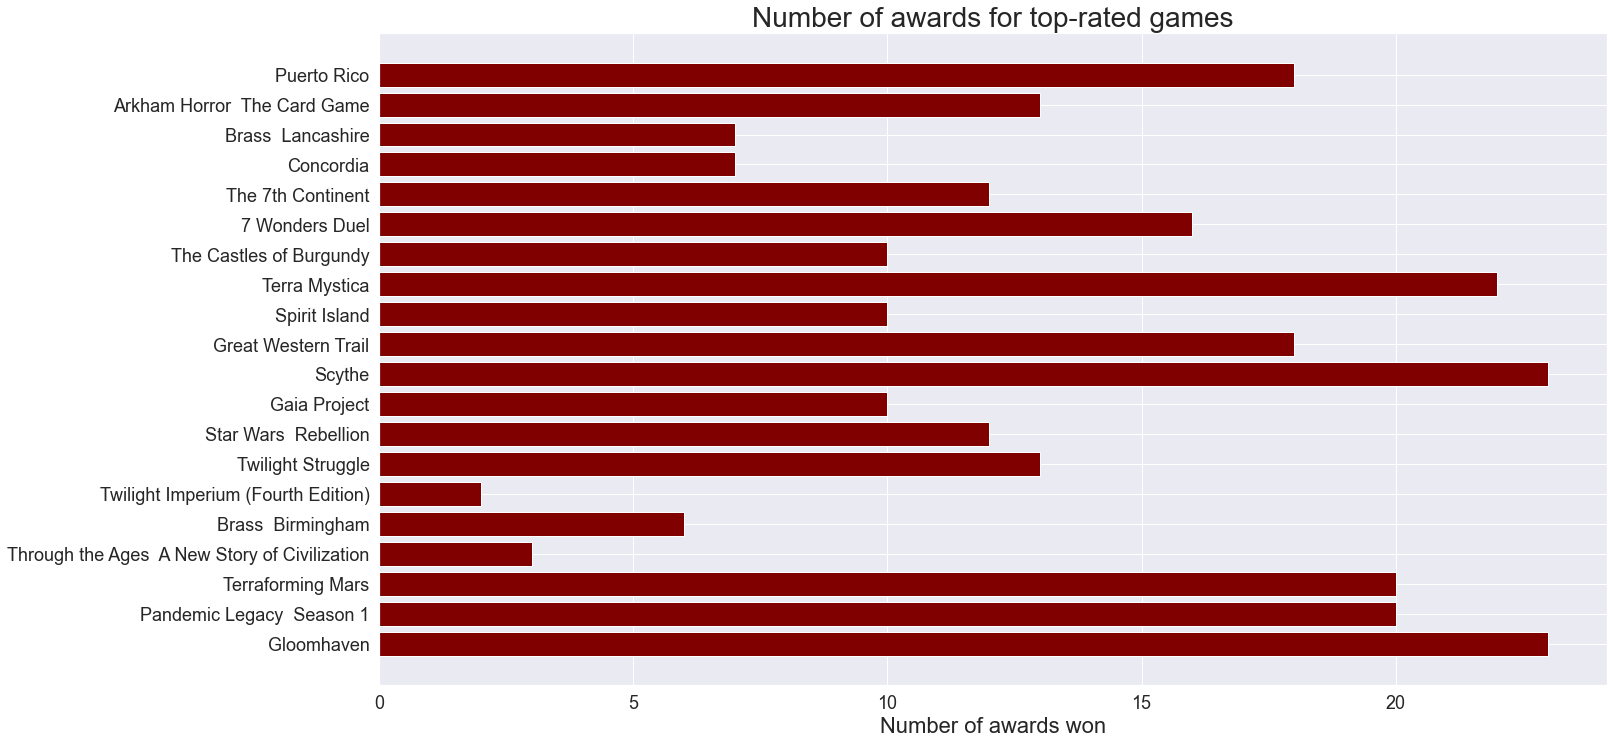

In [63]:
plt.figure(figsize = (22,12))
plt.barh(sample_plot.name, sample_plot.award_counts, color ='maroon')
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [64]:
sample_plot_1 = honor_df.tail(20)

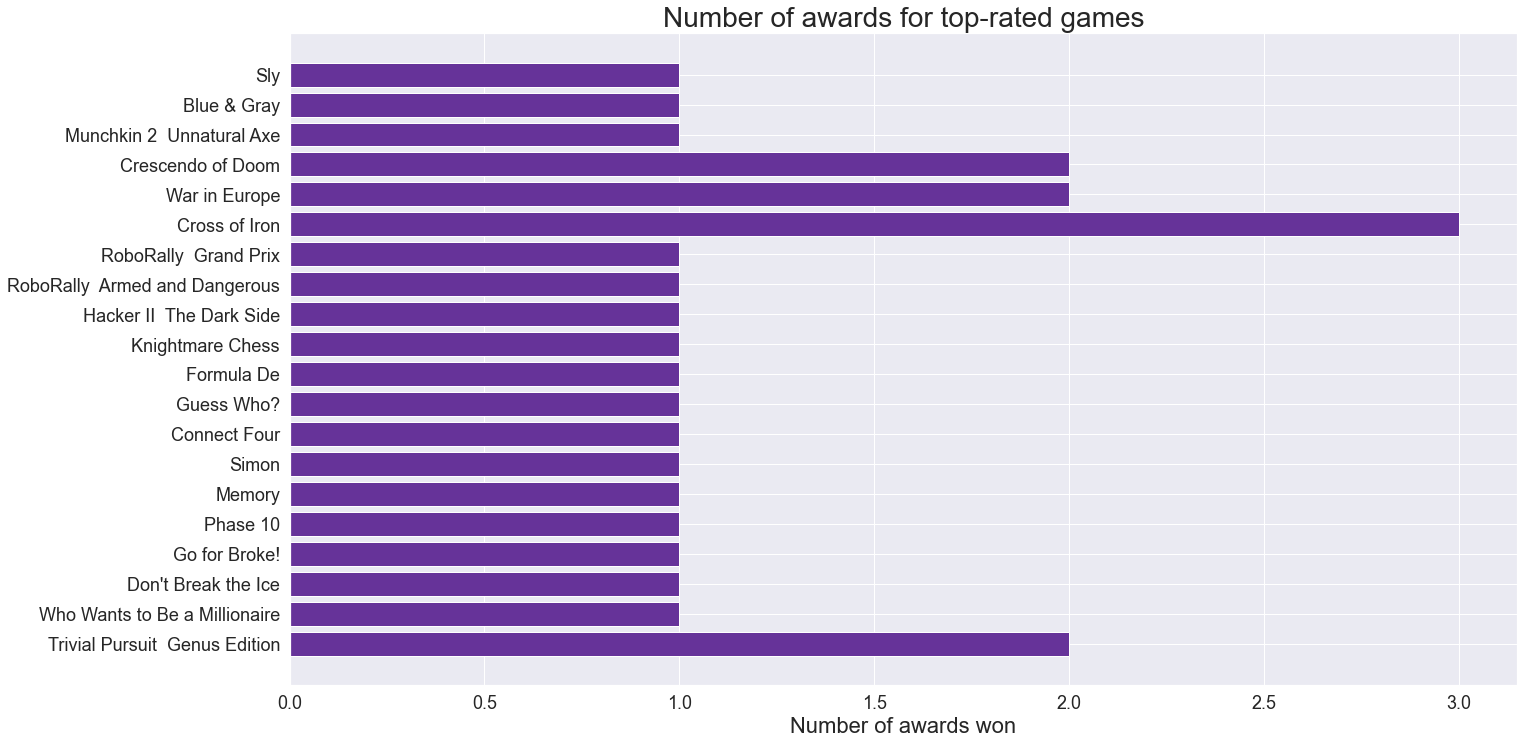

In [65]:
plt.figure(figsize = (22,12))
plt.barh(sample_plot_1.name, sample_plot_1.award_counts, color ='rebeccapurple')
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()